In [ ]:
from google.colab import drive
import pandas as pd

# 1. Montar tu Google Drive
drive.mount('/content/drive')

# 2. Rutas a tus archivos en Drive (ajusta si están en otra carpeta)
csv_path = '/content/drive/My Drive/resultados.csv'
pkl_path = '/content/drive/My Drive/resultados.pkl'

# 3. Cargar desde CSV
df_csv = pd.read_csv(csv_path, encoding='utf-8-sig')

print("=== CSV: Primeras 10 filas ===")
print(df_csv.head(10))

print("\n=== CSV: Últimas 10 filas ===")
print(df_csv.tail(10))

print(f"\nCSV – Total de registros: {len(df_csv):,}")

# 4. Cargar desde Pickle
df_pkl = pd.read_pickle(pkl_path)

print("\n=== Pickle: Primeras 10 filas ===")
print(df_pkl.head(10))

print("\n=== Pickle: Últimas 10 filas ===")
print(df_pkl.tail(10))

print(f"\nPickle – Total de registros: {len(df_pkl):,}")


Mounted at /content/drive
=== CSV: Primeras 10 filas ===
      type    subreddit                                              title  \
0     Post  immigration                 N400 Interview @ San Francisco, CA   
1     Post  immigration                                  Travel to Germany   
2     Post  immigration        K1 administrative processing for a year now   
3     Post  immigration           Need help navigating through immigration   
4  Comment  immigration  Comment on: Need help navigating through immig...   
5  Comment  immigration  Comment on: Need help navigating through immig...   
6  Comment  immigration  Comment on: Need help navigating through immig...   
7  Comment  immigration  Comment on: Need help navigating through immig...   
8  Comment  immigration  Comment on: Need help navigating through immig...   
9  Comment  immigration  Comment on: Need help navigating through immig...   

                                                text  score  num_comments  \
0  hey 

In [ ]:
# Instala las librerías clave para PNL avanzado
!pip install transformers sentencepiece accelerate
!pip install nltk
!pip install bertopic # Para el modelado de temas (Topic Modeling)

# Descarga recursos necesarios de NLTK
import nltk
nltk.download('stopwords')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 36.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 33.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 50.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 26.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 36.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitli

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import pandas as pd
from google.colab import drive
import re
from nltk.corpus import stopwords
import nltk

# --- 1. Cargar los Datos desde Google Drive ---
print("📂 Montando Google Drive...")
drive.mount('/content/drive')

# Define la ruta a tu archivo. Usaremos el Pickle por ser más robusto.
pkl_path = '/content/drive/My Drive/resultados.pkl'

print(f"🔄 Cargando datos desde: {pkl_path}")
# Carga los datos desde el archivo Pickle y asígnalos a la variable 'df'
df = pd.read_pickle(pkl_path)
print(f"✅ Datos cargados con éxito. Total de registros: {len(df):,}")


# --- 2. Preparar y Ejecutar la Limpieza de Texto ---

# Descarga las 'stopwords' (palabras comunes como 'the', 'a', 'is')
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def clean_text(text):
    """
    Función para limpiar texto: quita URLs, menciones, hashtags,
    caracteres especiales y convierte a minúsculas.
    """
    if not isinstance(text, str):
        return ""
    text = text.lower()  # Convertir a minúsculas
    text = re.sub(r'https?://\S+|www\.\S+', '', text)  # Quitar URLs
    text = re.sub(r'<.*?>', '', text)  # Quitar etiquetas HTML
    text = re.sub(r'@\w+', '', text)  # Quitar menciones
    text = re.sub(r'#\w+', '', text)  # Quitar hashtags
    text = re.sub(r'[^a-z\s]', '', text)  # Quitar todo lo que no sea letras o espacios
    text = ' '.join([word for word in text.split() if word not in stop_words]) # Quitar stopwords
    return text

# ¡Ahora este código funcionará porque 'df' ya existe!
print("\n🧹 Limpiando el texto de los posts y comentarios...")
df['text_clean'] = df['text'].apply(clean_text)
print("✅ Limpieza completada.")

# Muestra el resultado para verificar
print("\n--- Vista Previa del Texto Limpio ---")
display(df[['text', 'text_clean']].head())

📂 Montando Google Drive...
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
🔄 Cargando datos desde: /content/drive/My Drive/resultados.pkl
✅ Datos cargados con éxito. Total de registros: 21,924

🧹 Limpiando el texto de los posts y comentarios...


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


✅ Limpieza completada.

--- Vista Previa del Texto Limpio ---


,text,text_clean
0,"hey everyone, i’m not sure if i can post this ...",hey everyone im sure post wanted ask anyone go...
1,انا عندي ١٨ سنه متاخر سنه ولسا هبدا تالته ثانو...,b years old year late start third year high sc...
2,"Hello, so my finance went to her interview and...",hello finance went interview everything went f...
3,I am attempting to keep this a vague as possib...,attempting keep vague possible immigrant resid...
4,"Given you're over 21, your path is basically m...",given youre path basically marrying us citizen...


In [ ]:
from transformers import pipeline
import torch

# Detecta si hay una GPU disponible para acelerar el proceso
device = 0 if torch.cuda.is_available() else -1
print(f"Usando dispositivo: {'GPU' if device == 0 else 'CPU'}")

# Carga el pipeline de análisis de sentimiento
sentiment_pipeline = pipeline(
    'sentiment-analysis',
    model='cardiffnlp/twitter-xlm-roberta-base-sentiment',
    device=device
)

# Analiza el texto limpio en lotes (batch)
print("\n🧠 Realizando análisis de sentimiento con modelo Transformer...")
textos_validos = df[df['text_clean'] != '']['text_clean'].tolist()

# ==============================================================================
#  PLAN B: TRUNCACIÓN MANUAL (Solución Definitiva)
# ==============================================================================
# Ya que el pipeline falla, cortamos manualmente cada texto a un número
# de caracteres seguro. 512 tokens equivalen aprox. a 2000 caracteres.
# Esto garantiza que ningún texto excederá el límite del modelo.

max_chars = 2000
textos_truncados = [texto[:max_chars] for texto in textos_validos]
print(f"✂️ Plan B activado: Se han truncado todos los textos a un máximo de {max_chars} caracteres.")

# Ahora le pasamos la lista de textos ya truncados y seguros
resultados_sentimiento = sentiment_pipeline(textos_truncados, batch_size=16, padding=True, truncation=True)


# Asigna los resultados de vuelta al DataFrame
print("✅ Análisis de sentimiento completado. Asignando resultados...")
df_validos = df[df['text_clean'] != ''].copy()
# Usamos .lower() para estandarizar las etiquetas (ej. 'POSITIVE' -> 'positive')
df_validos['transformer_label'] = [res['label'].lower() for res in resultados_sentimiento]
df_validos['transformer_score'] = [res['score'] for res in resultados_sentimiento]

# Unimos los resultados con el DataFrame original
df = df.merge(df_validos[['transformer_label', 'transformer_score']], left_index=True, right_index=True, how='left')

# Muestra el resultado y el nuevo resumen de sentimientos
print("\n--- Vista Previa del Análisis Transformer ---")
display(df[['text', 'text_clean', 'transformer_label']].head())

print("\n--- Resumen de Sentimientos (Transformer) ---")
display(df['transformer_label'].value_counts(normalize=True).map('{:.2%}'.format))

Usando dispositivo: GPU


Device set to use cuda:0
Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.



🧠 Realizando análisis de sentimiento con modelo Transformer...
✂️ Plan B activado: Se han truncado todos los textos a un máximo de 2000 caracteres.
✅ Análisis de sentimiento completado. Asignando resultados...

--- Vista Previa del Análisis Transformer ---


,text,text_clean,transformer_label
0,"hey everyone, i’m not sure if i can post this ...",hey everyone im sure post wanted ask anyone go...,neutral
1,انا عندي ١٨ سنه متاخر سنه ولسا هبدا تالته ثانو...,b years old year late start third year high sc...,neutral
2,"Hello, so my finance went to her interview and...",hello finance went interview everything went f...,negative
3,I am attempting to keep this a vague as possib...,attempting keep vague possible immigrant resid...,negative
4,"Given you're over 21, your path is basically m...",given youre path basically marrying us citizen...,negative



--- Resumen de Sentimientos (Transformer) ---


,proportion
transformer_label,
neutral,56.23%
negative,32.27%
positive,11.50%


In [ ]:
from bertopic import BERTopic

# Filtra solo los textos negativos con suficiente contenido
docs_negativos = df[(df['transformer_label'] == 'negative') & (df['text_clean'].str.len() > 50)]['text_clean'].tolist()

if len(docs_negativos) > 20: # Se necesita un mínimo de documentos
    print(f"\n📊 Descubriendo temas en {len(docs_negativos)} comentarios negativos...")
    topic_model = BERTopic(language="english", verbose=False)
    topics, _ = topic_model.fit_transform(docs_negativos)

    # Muestra los temas encontrados
    print("🔥 Principales Temas de Frustración:")
    display(topic_model.get_topic_info())
else:
    print("\nNo hay suficientes textos negativos para un análisis de temas robusto.")


📊 Descubriendo temas en 5429 comentarios negativos...


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

🔥 Principales Temas de Frustración:


,Topic,Count,Name,Representation,Representative_Docs
0,-1,2495,-1_us_get_would_visa,"[us, get, would, visa, dont, im, like, work, p...",[personal background europe telecom engineer m...
1,0,260,0_sa_na_ng_ko,"[sa, na, ng, ko, yung, ang, ka, mo, lang, mga]",[advice ko try looking ways ease physical burd...
2,1,208,1_card_green_charge_charges,"[card, green, charge, charges, dismissed, crim...",[hi im hoping someone gone something similar i...
3,2,148,2_ice_agents_los_police,"[ice, agents, los, police, enforcement, people...",[recent ice posts reddit man pregnant woman ta...
4,3,132,3_trump_people_white_nazi,"[trump, people, white, nazi, power, fucking, n...",[centuries california remained nonwhite fact n...
...,...,...,...,...,...
73,72,11,72_ar_address_online_form,"[ar, address, online, form, update, change, ju...",[thank input update address online moment move...
74,73,11,73_degree_sponsor_visa_sorry,"[degree, sponsor, visa, sorry, university, ste...",[yea sorry doesnt work like need visa live wor...
75,74,10,74_news_biased_result_bad,"[news, biased, result, bad, rules, ban, postin...",[reposting banned muted rimmigration misinform...
76,75,10,75_shes_daughter_thinking_bright,"[shes, daughter, thinking, bright, emotional, ...",[im sorry situation sounds like political envi...


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Palabras clave para filtrar los comentarios más relevantes
app_keywords = ['lawfully', 'case tracker', 'hilites', 'myuscis', 'status checker', 'uscis app']
work_visa_keywords = ['h1b', 'tn', 'l1', 'o1', 'work visa', 'work permit', 'employer sponsorship']
relevant_keywords = app_keywords + work_visa_keywords

# Crea una expresión regular para buscar cualquiera de las palabras clave
# 'case_sensitive=False' asegura que encuentre 'H1B', 'h1b', 'H1b', etc.
regex_pattern = '|'.join(relevant_keywords)
df_relevant = df[
    (df['type'] == 'Comment') &
    (df['text'].str.contains(regex_pattern, case=False, na=False))
].copy()

print(f"🔎 Se encontraron {len(df_relevant)} comentarios relevantes sobre visas de trabajo y/o apps.")

🔎 Se encontraron 1431 comentarios relevantes sobre visas de trabajo y/o apps.


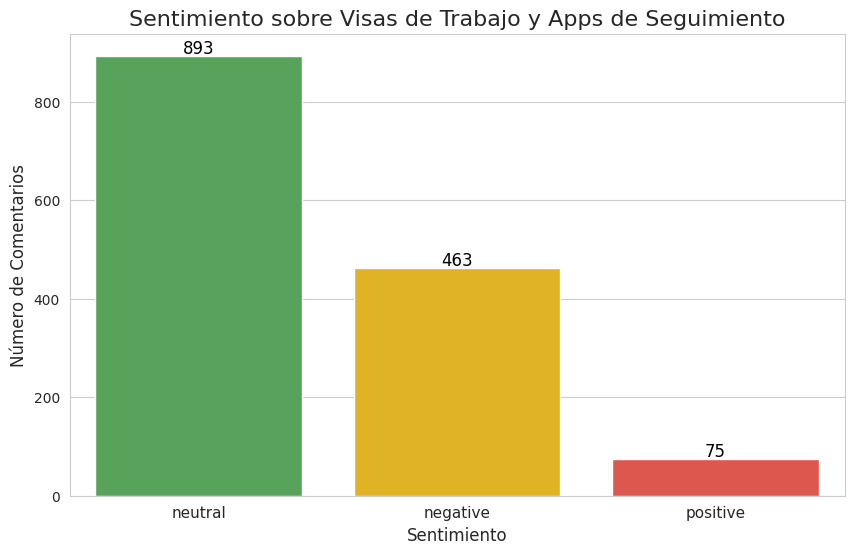

In [ ]:
# --- Gráfico de Sentimiento ---
if not df_relevant.empty:
    plt.figure(figsize=(10, 6))
    sns.set_style("whitegrid")

    # Contar los valores de cada etiqueta de sentimiento
    sentiment_counts = df_relevant['transformer_label'].value_counts()

    # Crear el gráfico
    ax = sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette=['#4CAF50', '#FFC107', '#F44336'])

    plt.title('Sentimiento sobre Visas de Trabajo y Apps de Seguimiento', fontsize=16)
    plt.ylabel('Número de Comentarios', fontsize=12)
    plt.xlabel('Sentimiento', fontsize=12)
    plt.xticks(fontsize=11)

    # Añadir el número exacto sobre cada barra
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                    textcoords='offset points')

    plt.show()
else:
    print("No hay suficientes datos relevantes para generar el gráfico.")

In [ ]:
from transformers import pipeline
from IPython.display import display, Markdown

# Carga el modelo de traducción de Inglés a Español
# Este paso puede tardar un minuto la primera vez que se ejecuta
print("🧠 Cargando modelo de traducción (puede tardar un momento)...")
translator = pipeline("translation_en_to_es", model="Helsinki-NLP/opus-mt-en-es")
print("✅ Modelo de traducción listo.")

🧠 Cargando modelo de traducción (puede tardar un momento)...


config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/312M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/44.0 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/312M [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/802k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/826k [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

Device set to use cuda:0


✅ Modelo de traducción listo.


In [ ]:
import textwrap

def mostrar_comentario_en_tarjeta(comentario_row):
    """
    Toma una fila de un DataFrame y la imprime en un formato de tarjeta de texto plano.
    """
    # --- Configuración de la Tarjeta ---
    ancho_total = 80  # Ancho total de la tarjeta en caracteres
    padding_texto = 2
    ancho_texto = ancho_total - (padding_texto * 2) - 2 # Ancho para el texto del comentario

    # --- Asignación de Emoji y Etiqueta ---
    label = comentario_row['transformer_label']
    if label == 'positive':
        etiqueta = "✅ POSITIVO"
    elif label == 'negative':
        etiqueta = "❌ NEGATIVO"
    else:
        etiqueta = "➖ NEUTRAL"

    # --- Creación del Encabezado ---
    score_str = f"PUNTUACIÓN: {comentario_row['score']}"
    subreddit_str = f"SUBREDDIT: r/{comentario_row['subreddit']}"
    header_info = f"{etiqueta} | {score_str} | {subreddit_str}"

    # --- Impresión de la Tarjeta ---
    print('╔' + '═' * (ancho_total - 2) + '╗')
    print('║' + header_info.center(ancho_total - 2) + '║')
    print('╟' + '─' * (ancho_total - 2) + '╢')

    # --- Procesamiento y Párrafo del Comentario ---
    texto_traducido = f'"{comentario_row["texto_traducido"]}"'
    lineas_envueltas = textwrap.wrap(texto_traducido, width=ancho_texto)

    for linea in lineas_envueltas:
        # Justifica la línea y añade padding y los bordes
        print('║' + ' ' * padding_texto + linea.ljust(ancho_texto) + ' ' * padding_texto + '║')

    print('╚' + '═' * (ancho_total - 2) + '╝')
    print() # Añade un espacio entre tarjetas


# ==============================================================================
# 🏆 TOP 20 COMENTARIOS MÁS RELEVANTES (NUEVO FORMATO DE TEXTO) 🏆
# ==============================================================================

# Asegúrate de que los comentarios estén traducidos
if 'texto_traducido' not in top_20_comments.columns:
    print("🔄 Traduciendo los 20 comentarios más importantes... esto puede tardar unos minutos.")
    top_20_comments = df_relevant.sort_values(by='score', ascending=False).head(20)

    if not top_20_comments.empty:
        textos_a_traducir = top_20_comments['text'].tolist()
        traducciones = translator(textos_a_traducir)
        top_20_comments['texto_traducido'] = [t['translation_text'] for t in traducciones]
        print("✅ Traducción completada. Mostrando resultados:\n")
    else:
        print("No se encontraron comentarios relevantes para mostrar.")
else:
    print("✅ Comentarios ya traducidos. Mostrando resultados:\n")


# Itera y muestra cada comentario usando la nueva función de formato
if not top_20_comments.empty:
    for index, row in top_20_comments.iterrows():
        mostrar_comentario_en_tarjeta(row)

✅ Comentarios ya traducidos. Mostrando resultados:

╔══════════════════════════════════════════════════════════════════════════════╗
║             ➖ NEUTRAL | PUNTUACIÓN: 173 | SUBREDDIT: r/EyesOnIce             ║
╟──────────────────────────────────────────────────────────────────────────────╢
║  "Amazon necesita permiso de trabajo y SSN para que la gente trabaje para    ║
║  ellos - eso significa que es lo suficientemente legal para trabajar ..."    ║
╚══════════════════════════════════════════════════════════════════════════════╝

╔══════════════════════════════════════════════════════════════════════════════╗
║                ➖ NEUTRAL | PUNTUACIÓN: 148 | SUBREDDIT: r/h1b                ║
╟──────────────────────────────────────────────────────────────────────────────╢
║  "La gente H1b en general están acostumbrados a vivir en la incertidumbre.   ║
║  Este es uno de ellos que está fuera de nuestro control. Nadie aquí tendrá   ║
║  la respuesta aquí. Siempre y cuando no le está afecta

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!



☁️ Preparando datos para la Nube de Palabras en Español...
🔄 Traduciendo una muestra de hasta 500 comentarios (puede tardar)...
✅ Traducción para la nube de palabras completada.


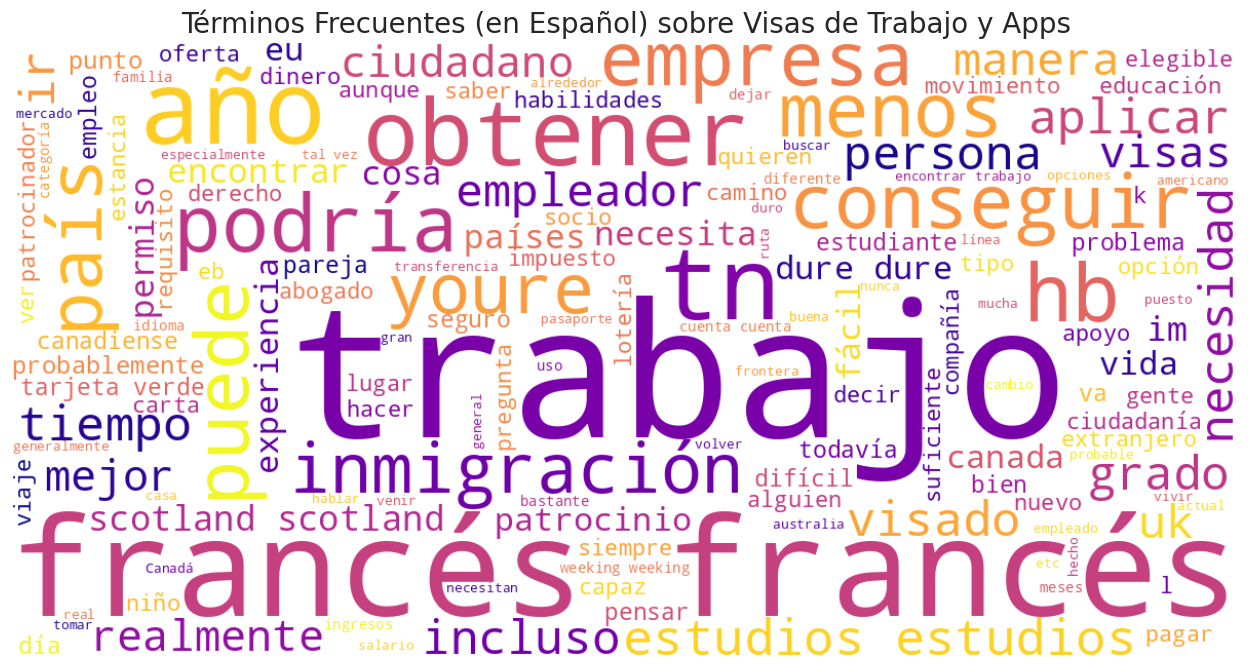

In [ ]:
import nltk
from nltk.corpus import stopwords

# Descarga las stopwords (palabras comunes) en español
nltk.download('stopwords')
stopwords_es = set(stopwords.words('spanish'))

# Añade palabras comunes del contexto que no aportan valor
palabras_irrelevantes = ['visa', 'uscis', 'h1b', 'greencard', 'caso', 'proceso', 'aplicación', 'gracias']
stopwords_es.update(palabras_irrelevantes)


# --- Nube de Palabras en Español ---
if not df_relevant.empty:
    print("\n☁️ Preparando datos para la Nube de Palabras en Español...")
    print("🔄 Traduciendo una muestra de hasta 500 comentarios (puede tardar)...")

    # Toma una muestra grande para la nube de palabras y traduce el texto limpio
    sample_for_wordcloud = df_relevant.sort_values(by='score', ascending=False).head(500)
    textos_limpios_a_traducir = sample_for_wordcloud['text_clean'].dropna().tolist()

    if textos_limpios_a_traducir:
        traducciones_wc = translator(textos_limpios_a_traducir)
        full_text_es = ' '.join([t['translation_text'] for t in traducciones_wc])
        print("✅ Traducción para la nube de palabras completada.")

        # Genera la nube de palabras con las stopwords en español
        wordcloud = WordCloud(width=1200, height=600, background_color='white',
                              stopwords=stopwords_es, colormap='plasma',
                              max_words=150).generate(full_text_es)

        plt.figure(figsize=(16, 8))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title('Términos Frecuentes (en Español) sobre Visas de Trabajo y Apps', fontsize=20)
        plt.show()
    else:
        print("No hay texto limpio para generar la nube de palabras.")
else:
    print("No hay suficientes datos para generar la nube de palabras.")

🎯 Iniciando análisis enfocado en Apps de Seguimiento...
🔎 Se encontraron 19 comentarios relevantes sobre apps de seguimiento.


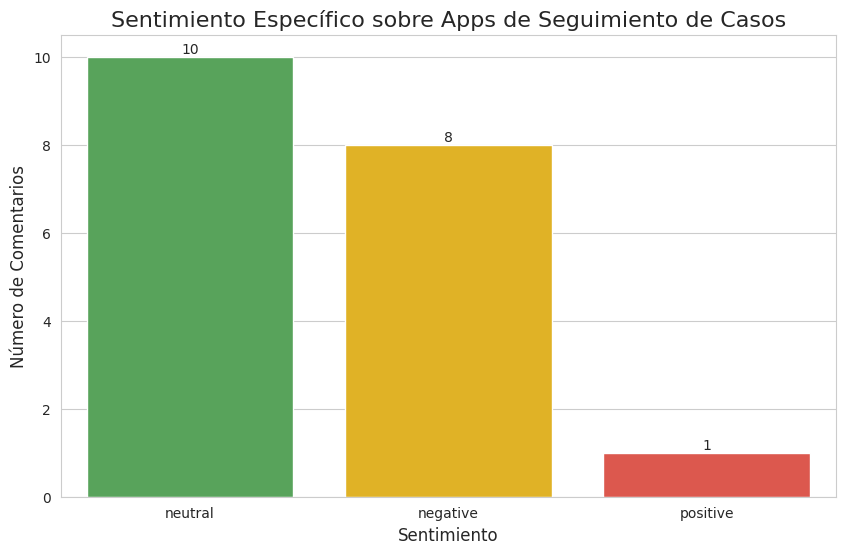


🏆 TOP COMENTARIOS SOBRE APPS DE SEGUIMIENTO (TRADUCIDOS) 🏆

🔄 Traduciendo los comentarios más importantes sobre apps...
✅ Traducción completada. Mostrando resultados:

╔══════════════════════════════════════════════════════════════════════════════╗
║               ❌ NEGATIVO | PUNTUACIÓN: 26 | SUBREDDIT: r/expat               ║
╟──────────────────────────────────────────────────────────────────────────────╢
║  "En primer lugar - Asumiendo que usted no tiene la ciudadanía relevante     ║
║  para uno de esos países, ¿cómo planea obtener una visa para mudarse allí?   ║
║  Usted no puede legalmente llegar allí y quedarse. Usted necesita obtener    ║
║  una visa primero. Segundo - ¿Conoce el idioma? La mayoría de los            ║
║  empleadores esperarán que usted sea al menos funcional en el idioma. Toma   ║
║  años para aprender un nuevo idioma, así que si usted no lo sabe todavía,    ║
║  yo empezaría a hacerlo ahora. Tercero - ¿Has visitado? ¿Conoce a la gente   ║
║  allí? ¿Cómo planea

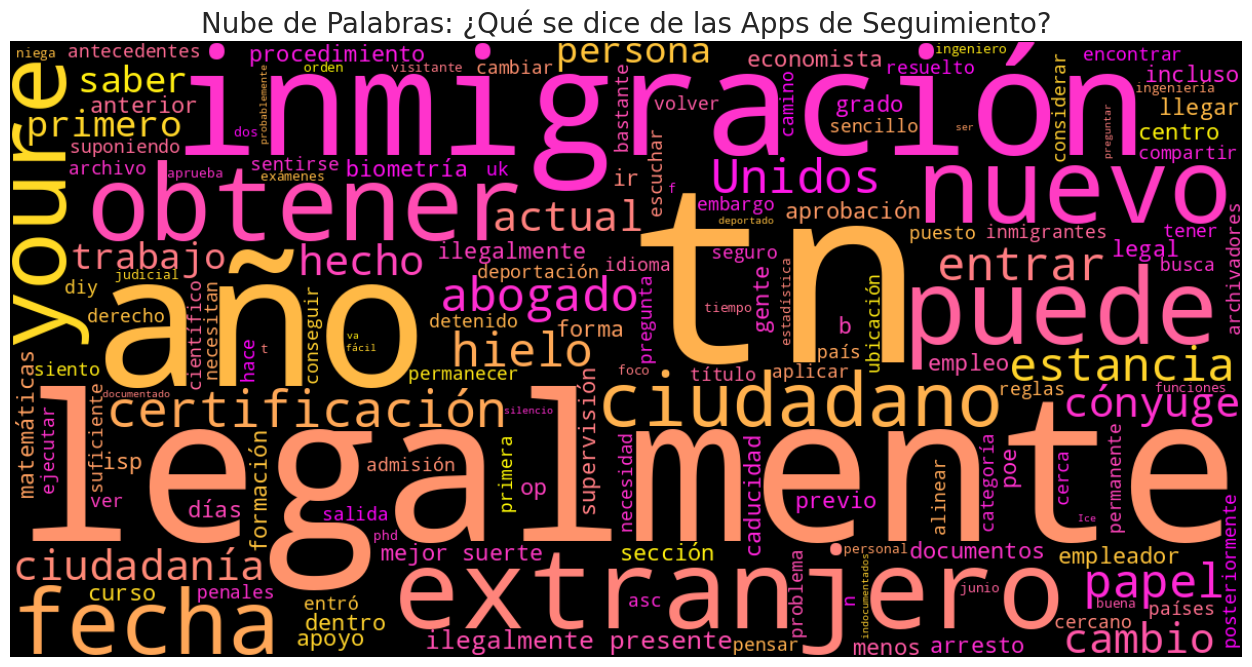

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import textwrap
import nltk
from nltk.corpus import stopwords
from transformers import pipeline
from IPython.display import display, Markdown

# ==============================================================================
#  ANÁLISIS ENFOCADO: APPS DE SEGUIMIENTO DE CASOS
# ==============================================================================
print("🎯 Iniciando análisis enfocado en Apps de Seguimiento...")

# --- 1. Filtrar Comentarios que Mencionan Apps ---
app_keywords = ['lawfully', 'case tracker', 'hilites', 'myuscis', 'status checker', 'uscis app', 'visa tracking', 'online tracker']
regex_pattern_apps = '|'.join(app_keywords)

# Filtramos el DataFrame original 'df' para encontrar solo comentarios sobre apps
df_apps = df[
    (df['type'] == 'Comment') &
    (df['text'].str.contains(regex_pattern_apps, case=False, na=False))
].copy()

if df_apps.empty:
    print("⚠️ No se encontraron comentarios que mencionen apps de seguimiento con las palabras clave actuales.")
else:
    print(f"🔎 Se encontraron {len(df_apps)} comentarios relevantes sobre apps de seguimiento.")

    # --- 2. Gráfico: Sentimiento Específico sobre las Apps ---
    plt.figure(figsize=(10, 6))
    sns.set_style("whitegrid")
    sentiment_counts_apps = df_apps['transformer_label'].value_counts()
    ax_apps = sns.barplot(x=sentiment_counts_apps.index, y=sentiment_counts_apps.values, palette=['#4CAF50', '#FFC107', '#F44336'])
    plt.title('Sentimiento Específico sobre Apps de Seguimiento de Casos', fontsize=16)
    plt.ylabel('Número de Comentarios', fontsize=12)
    plt.xlabel('Sentimiento', fontsize=12)
    for p in ax_apps.patches:
        ax_apps.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')
    plt.show()

    # --- 3. Top Comentarios sobre Apps (Traducidos y en Tarjetas) ---
    print("\n" + "="*80)
    print("🏆 TOP COMENTARIOS SOBRE APPS DE SEGUIMIENTO (TRADUCIDOS) 🏆")
    print("="*80 + "\n")

    # Tomamos los 15 más votados para este análisis enfocado
    top_app_comments = df_apps.sort_values(by='score', ascending=False).head(15)

    if not top_app_comments.empty:
        # Carga el modelo si no está ya cargado
        try:
            translator
        except NameError:
            print("🧠 Cargando modelo de traducción...")
            translator = pipeline("translation_en_to_es", model="Helsinki-NLP/opus-mt-en-es")
            print("✅ Modelo de traducción listo.")

        print("🔄 Traduciendo los comentarios más importantes sobre apps...")
        textos_a_traducir_apps = top_app_comments['text'].tolist()
        traducciones_apps = translator(textos_a_traducir_apps)
        top_app_comments['texto_traducido'] = [t['translation_text'] for t in traducciones_apps]
        print("✅ Traducción completada. Mostrando resultados:\n")

        # Reutilizamos la función de mostrar en tarjeta
        for index, row in top_app_comments.iterrows():
            mostrar_comentario_en_tarjeta(row) # Esta función la definimos en la celda anterior
    else:
        print("No hay comentarios suficientes para mostrar un Top.")


    # --- 4. Nube de Palabras en Español sobre Apps ---
    print("\n☁️ Preparando datos para la Nube de Palabras sobre Apps...")
    # Descarga stopwords en español si no se ha hecho
    try:
        stopwords_es
    except NameError:
        nltk.download('stopwords')
        stopwords_es = set(stopwords.words('spanish'))
        # Añadimos los nombres de las apps para que no dominen la nube de palabras
        stopwords_es.update(['app', 'lawfully', 'hilites', 'tracker', 'case', 'caso'])

    textos_limpios_apps = df_apps['text_clean'].dropna().tolist()

    if textos_limpios_apps:
        print("🔄 Traduciendo textos para la nube de palabras (esto puede tardar)...")
        traducciones_wc_apps = translator(textos_limpios_apps)
        full_text_es_apps = ' '.join([t['translation_text'] for t in traducciones_wc_apps])
        print("✅ Traducción completada.")

        wordcloud_apps = WordCloud(width=1200, height=600, background_color='black',
                                   stopwords=stopwords_es, colormap='spring',
                                   max_words=150).generate(full_text_es_apps)

        plt.figure(figsize=(16, 8))
        plt.imshow(wordcloud_apps, interpolation='bilinear')
        plt.axis('off')
        plt.title('Nube de Palabras: ¿Qué se dice de las Apps de Seguimiento?', fontsize=20)
        plt.show()